# coursera week1 : Lab Session-Basics of returns

In [ ]:
prices_a = [8.7, 8.90, 8.71]

In [ ]:
prices_a[1:]

In [ ]:
prices_a[:-1]

In [ ]:
import numpy as np

In [ ]:
prices_a = np.array([8.7, 8.91, 8.71])

In [ ]:
prices_a

In [ ]:
prices_a[1:] / prices_a[:-1]  - 1

In [ ]:
import pandas as pd
prices = pd.DataFrame({"BLUE": [8.7, 8.91, 8.71, 8.43, 8.73] 
                       ,
                      "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]
                      })

In [ ]:
prices

In [ ]:
prices.iloc[1:] / prices.iloc[:-1]   # alligning rows, so not usefull

In [ ]:
prices.iloc[1:].values / prices.iloc[:-1] - 1

In [ ]:
prices.iloc[1:] / prices.iloc[:-1].values - 1

In [ ]:
# better
prices/prices.shift(1) - 1

In [ ]:
# best
prices.pct_change()[1:]

In [ ]:
prices_up = pd.read_csv('sample_prices.csv')

In [ ]:
returns = prices_up.pct_change()
returns

In [ ]:
prices_up.plot()

In [ ]:
%matplotlib inline

In [ ]:
returns.plot.bar()

In [ ]:
returns.std()

In [ ]:
returns.mean()

In [ ]:
np.prod(returns+1) -1

In [ ]:
(returns+1).prod() -1

In [ ]:
rm = 0.01
(1 + rm)**12

In [ ]:
rw = 0.01
(1+rw)**52

## 2 Lab Session-Risk Adjusted returns

In [ ]:
prices = pd.read_csv('sample_prices.csv')
returns = prices.pct_change()
returns = returns.dropna()
print(returns)
print("Standard deviation: ", returns.std())
print("mean: ", returns.mean())


In [ ]:
returns.shape

In [ ]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
#variance = squared_deviations.mean()
# use numpy
#volatility = np.sqrt(variance)
#volatility

In [ ]:
number_of_obs = returns.shape[0]
variance = squared_deviations.sum()/ (number_of_obs -1)
volatility = variance**0.5
volatility

In [ ]:
returns.std()* np.sqrt(12)   # yearly volatility

In [ ]:
returns = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv", header = 0, index_col=0, parse_dates =True, na_values=-99.99)

In [ ]:
returns.head()

In [ ]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]    # only interested in 2 columns
returns = returns/100
returns.columns = ['SmallCap', "LargeCap"]   # change column names
returns.head()

In [ ]:
returns.plot.line()

In [ ]:
returns.std()

In [ ]:
annualized_vol = returns.std()*np.sqrt(12)

In [ ]:
annualized_vol

In [ ]:
n_months = returns.shape[0]
return_per_month = (returns + 1).prod()**(1/n_months) - 1
return_per_month 

In [ ]:
annulized_return = (returns + 1).prod()**(12/n_months) - 1

In [ ]:
annulized_return

In [ ]:
annulized_return/annulized_vol

In [ ]:
riskfree_rate = 0.03
excess_return = annulized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

## Lab Session-Drawdown

In [ ]:
me_m = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv", 
                   header = 0, index_col=0, parse_dates =True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()



In [27]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")   # convert index to data time field

In [ ]:
rets.plot.line()

In [ ]:
rets.index = rets.index.to_period("M")    # convert to month period

In [ ]:
rets["1975"]

## from 8min 30 compute drawdowns
1. compute wealth index
2. computer previous peaks
3. computer drawdown - which is the wealth value as a perc of previous peak

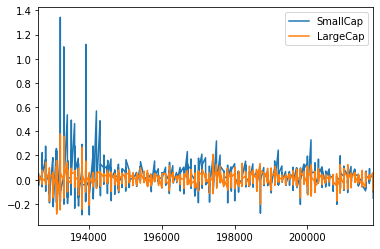

In [2]:
import pandas as pd

me_m = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv", header = 0, index_col=0, parse_dates =True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()


In [ ]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()  # 1000 with compound return

In [ ]:
wealth_index.head()
wealth_index.plot.line()

In [ ]:
previous_peaks = wealth_index.cummax()    # the maximum wealth index


In [ ]:
previous_peaks.plot()

In [ ]:
drawdown = (wealth_index - previous_peaks)/ previous_peaks
drawdown.plot()

In [ ]:
drawdown.min()

In [ ]:
drawdown["1975":].min()    # max drawdown since 1975 

In [ ]:
drawdown["1975":].idxmin()  # when was the minimum since 1975

In [7]:
rets

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
192612,-0.0266,0.0301
192701,0.0453,-0.0043
192702,0.0685,0.0365
192703,-0.0591,0.0085
192704,0.0467,0.0090


In [22]:
# create function to compute drawdown, peak etc
def drawdown(return_series: pd.Series):   # expect a pd series as input
    """ 
    Take as timeseries of asset returns  
    computes and returns a dataframe that containes:
    the wealth index
    the previos peaks
    percent drawdown
    """
    wealth_index = 1000*(1+ return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/ previous_peaks
    
    #dummy = pd.Dataframe({"W": wealth_index, "P" : previous_peaks, "D": drawdowns })
    d = pd.DataFrame({"Wealth": wealth_index, "Peaks": previous_peaks, "Drawdown" : drawdowns})
    return d


    


In [19]:
drawdown(rets["LargeCap"]).head()

,Wealth,Peaks,Drawdown
192607,1032.900000,1032.900000,0.0000
192608,1071.117300,1071.117300,0.0000
192609,1078.293786,1078.293786,0.0000
192610,1052.091247,1078.293786,-0.0243
192611,1080.497711,1080.497711,0.0000


In [20]:
drawdown(rets["SmallCap"]).head()

,Wealth,Peaks,Drawdown
192607,985.500000,985.500000,0.000000
192608,1035.957600,1035.957600,0.000000
192609,1045.592006,1045.592006,0.000000
192610,994.985353,1045.592006,-0.048400
192611,987.224467,1045.592006,-0.055822


Signature: drawdown(return_series:pandas.core.series.Series)
Docstring:
Take as timeseries of asset returns  
computes and returns a dtaframe thar containes:
the wealth index
the previos peaks
percent drawdown
File:      c:\users\peter\python_projects\tensorflow2\coursera_portfolio\<ipython-input-18-5ccc61863baf>
Type:      function


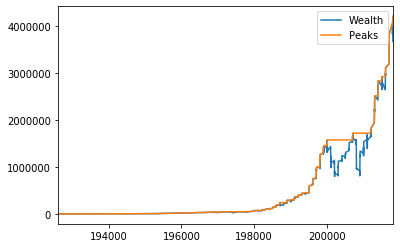

In [23]:
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]].plot()

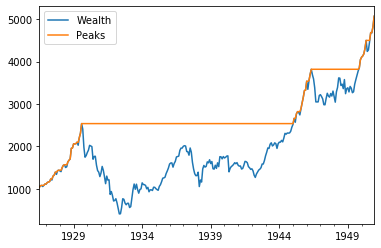

In [28]:
drawdown(rets[:"1950"]["LargeCap"])[["Wealth", "Peaks"]].plot()

In [29]:
drawdown(rets["LargeCap"])["Drawdown"].min()

-0.8400375277943123

In [30]:
drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Timestamp('1932-05-01 00:00:00')

## building modules

In [31]:
import hello as h

In [33]:
h.message

'hello jim'

In [34]:
%load_ext autoreload

In [ ]:
# hello has changed , changes only updated if autoreload entered


In [35]:
%autoreload 2

In [36]:
h.message

'hello jane!!!'

In [39]:
import edhec_risk_kit as erk

returns = erk.get_ffme_returns()

In [41]:
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [42]:
erk.drawdown(returns["SmallCap"])["Drawdown"].min()

-0.8330007793945303